In [2]:
import pandas as pd

df = pd.read_csv("https://www.openml.org/data/get_csv/1595261/adult-census.csv")

In [3]:
target_name = "class"
target = df[target_name]
data = df.drop(columns=[target_name, "fnlwgt"])
target = (target == ' >50K').astype(int)

In [4]:
target.value_counts()

0    37155
1    11687
Name: class, dtype: int64

In [5]:
from imblearn.datasets import make_imbalance

data, target = make_imbalance(data, target, sampling_strategy={1: 1000})

In [6]:
target.value_counts(normalize=True)

0    0.973791
1    0.026209
Name: class, dtype: float64

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    data, target, random_state=0
)

In [8]:
binary_encoding_columns = ['sex']
one_hot_encoding_columns = ['workclass', 'education', 'marital-status',
                            'occupation', 'relationship',
                            'race', 'native-country']
scaling_columns = ['age', 'education-num', 'hours-per-week',
                   'capital-gain', 'capital-loss']

In [32]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier

preprocessor_lr = ColumnTransformer([
    ('binary-encoder', OrdinalEncoder(), binary_encoding_columns),
    ('one-hot-encoder', OneHotEncoder(handle_unknown='ignore'),
     one_hot_encoding_columns),
    ('standard-scaler', StandardScaler(), scaling_columns)
])
model_lr = make_pipeline(
    preprocessor_lr,
#     LogisticRegression(
#         solver='lbfgs', max_iter=1000
#     )
    RandomForestClassifier()
#     DummyClassifier(strategy="most_frequent")
)

In [33]:
model_lr.fit(X_train, y_train)
y_pred = model_lr.predict(X_test)
model_lr.score(X_test, y_test)

0.9754691267428451

In [34]:
from sklearn.metrics import balanced_accuracy_score

balanced_accuracy_score(y_test, y_pred)

0.6047560334142302

In [37]:
from sklearn.inspection import permutation_importance

scoring = ["accuracy", "balanced_accuracy"]
importances = permutation_importance(
    model_lr, X_test, y_test, scoring=scoring,
    n_repeats=30, n_jobs=-1
)

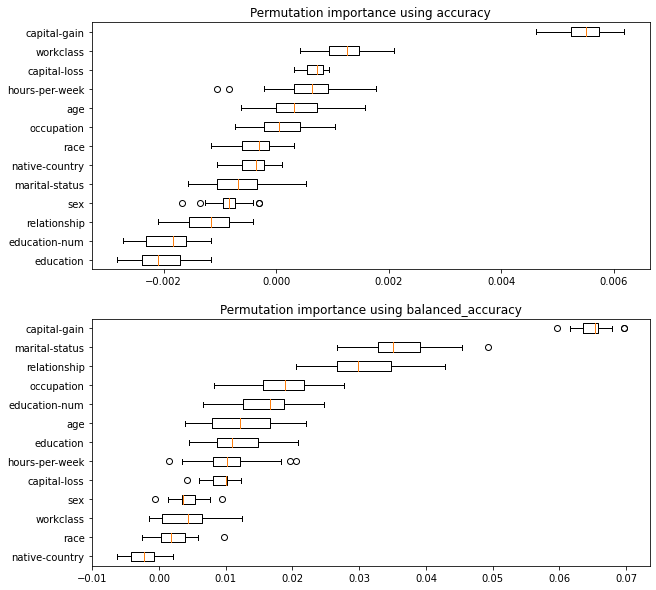

In [38]:
import matplotlib.pyplot as plt

_, axs = plt.subplots(nrows=len(scoring), figsize=(10, 10))
for metric, ax in zip(scoring, axs):
    result = importances[metric]
    sorted_idx = result.importances_mean.argsort()

    ax.boxplot(result.importances[sorted_idx].T,
               vert=False, labels=X_test.columns[sorted_idx])
    ax.set_title(f"Permutation importance using {metric}")

In [22]:
from imblearn.pipeline import make_pipeline as make_pipeline_imblearn
from imblearn.ensemble import BalancedRandomForestClassifier
model_lr = make_pipeline_imblearn(
    preprocessor_lr,
#     LogisticRegression(
#         solver='lbfgs', max_iter=1000, class_weight="balanced",
#     )
    BalancedRandomForestClassifier(n_jobs=-1)
)

In [23]:
model_lr.fit(X_train, y_train)
y_pred = model_lr.predict(X_test)
model_lr.score(X_test, y_test)

0.8007128629835413

In [24]:
from sklearn.metrics import balanced_accuracy_score

balanced_accuracy_score(y_test, y_pred)

0.8113549012051204

In [25]:
from sklearn.inspection import permutation_importance

scoring = ["accuracy","balanced_accuracy", "precision", "recall"]
importances = permutation_importance(
    model_lr[-1], model_lr[0].transform(X_test).A, y_test, scoring=scoring,
    n_repeats=5, n_jobs=-1
)

In [26]:
data["marital-status"].value_counts()

 Never-married            15442
 Married-civ-spouse       13257
 Divorced                  6013
 Separated                 1442
 Widowed                   1400
 Married-spouse-absent      576
 Married-AF-spouse           25
Name: marital-status, dtype: int64

NameError: name 'feature_names' is not defined

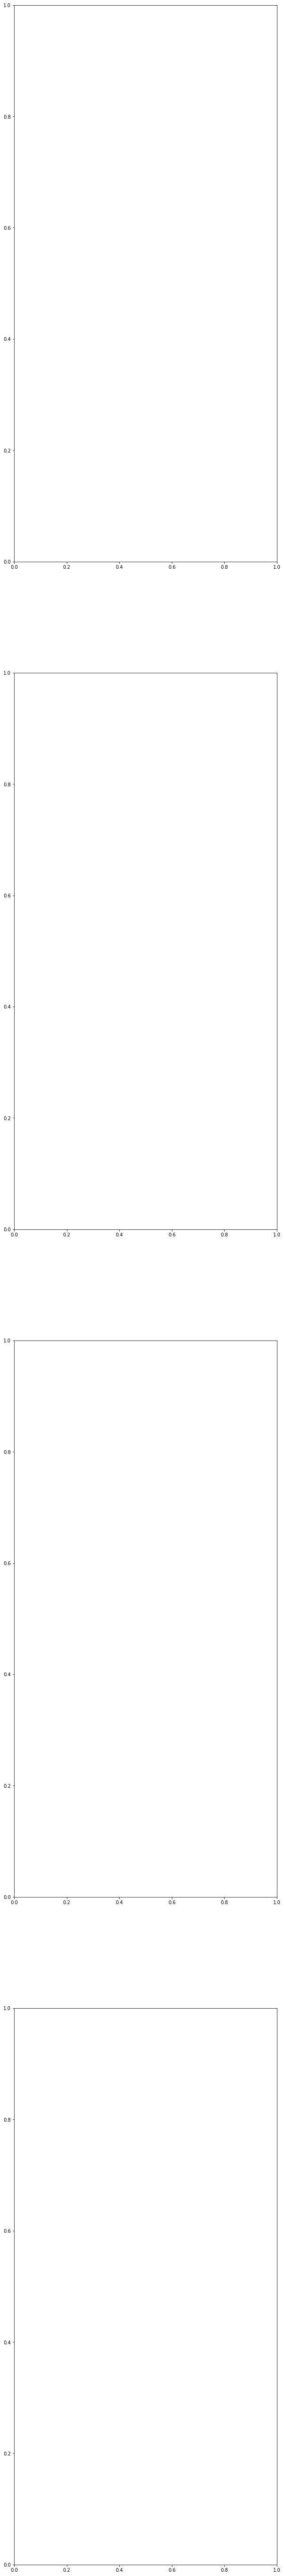

In [28]:
import matplotlib.pyplot as plt
import numpy as np

_, axs = plt.subplots(nrows=len(scoring), figsize=(10, 100))
for metric, ax in zip(scoring, axs):
    result = importances[metric]
    sorted_idx = result.importances_mean.argsort()

    ax.boxplot(result.importances[sorted_idx].T,
               vert=False, labels=np.array(feature_names)[sorted_idx])
    ax.set_title(f"Permutation importance using {metric}")

In [29]:
binary_encoding_columns = ['sex']
one_hot_encoding_columns = ['workclass', 'education', 'marital-status',
                            'occupation', 'relationship',
                            'race', 'native-country']
scaling_columns = ['age', 'education-num', 'hours-per-week',
                   'capital-gain', 'capital-loss']

In [30]:
ohe = (model_lr[0].named_transformers_['one-hot-encoder'])
feature_names_ohe = ohe.get_feature_names(input_features=one_hot_encoding_columns)
feature_names = binary_encoding_columns + feature_names_ohe.tolist() + scaling_columns
feature_names

['sex',
 'workclass_ ?',
 'workclass_ Federal-gov',
 'workclass_ Local-gov',
 'workclass_ Never-worked',
 'workclass_ Private',
 'workclass_ Self-emp-inc',
 'workclass_ Self-emp-not-inc',
 'workclass_ State-gov',
 'workclass_ Without-pay',
 'education_ 10th',
 'education_ 11th',
 'education_ 12th',
 'education_ 1st-4th',
 'education_ 5th-6th',
 'education_ 7th-8th',
 'education_ 9th',
 'education_ Assoc-acdm',
 'education_ Assoc-voc',
 'education_ Bachelors',
 'education_ Doctorate',
 'education_ HS-grad',
 'education_ Masters',
 'education_ Preschool',
 'education_ Prof-school',
 'education_ Some-college',
 'marital-status_ Divorced',
 'marital-status_ Married-AF-spouse',
 'marital-status_ Married-civ-spouse',
 'marital-status_ Married-spouse-absent',
 'marital-status_ Never-married',
 'marital-status_ Separated',
 'marital-status_ Widowed',
 'occupation_ ?',
 'occupation_ Adm-clerical',
 'occupation_ Armed-Forces',
 'occupation_ Craft-repair',
 'occupation_ Exec-managerial',
 'occupa

AttributeError: 'BalancedRandomForestClassifier' object has no attribute 'coef_'

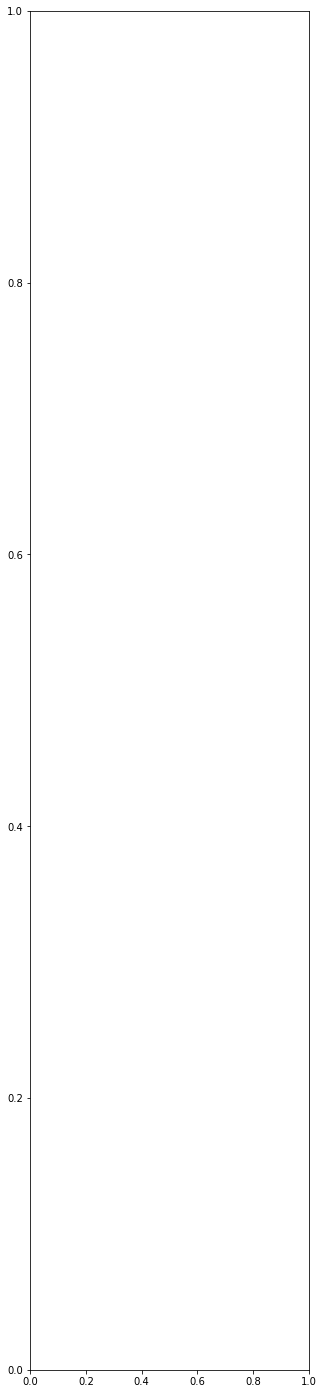

In [31]:
import numpy as np
import pandas as pd

_, ax = plt.subplots(figsize=(5, 25))
serie = pd.Series(model_lr[-1].coef_[0], index=feature_names)
serie.plot.barh(ax=ax)

In [ ]:
from sklearn.datasets import make_low_rank_matrix

X = make_low_rank_matrix(n_samples=3_000, n_features=500, random_state=0)
y = X @ np.ones(X.shape[1]) # + 5e-8 * rng.randn(X.shape[0])
y += y.std() * 0.1 * rng.randn(X.shape[0])
y = (y > 1.5 * np.std(y)).astype(np.int32)

In [1127]:
import numpy as np
from sklearn.preprocessing import scale
rng = np.random.RandomState(1)


Z = rng.randn(100_000, 2)
X = np.concatenate(
    [
#         rng.randn(Z.shape[0], 5),
        Z,
        Z[:, [-1]] + 1e-2 * rng.randn(Z.shape[0], 1),
    ], axis=1
)
# X = scale(X)

In [1158]:
y = Z @ np.ones(Z.shape[1]) + 2 * rng.randn(X.shape[0])
y = (y > 1.5 * np.std(y)).astype(np.int32)

In [1159]:
from collections import Counter

Counter(y)

Counter({0: 93243, 1: 6757})

In [1160]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, random_state=0, test_size=0.5
)

In [1177]:
model = LogisticRegression(C=10).fit(X_train, y_train)

In [1178]:
model.intercept_

array([-3.37634995])

<BarContainer object of 3 artists>

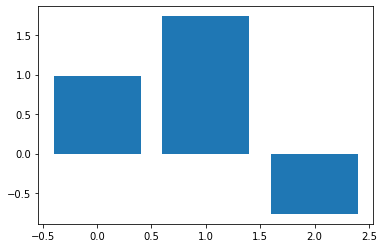

In [1179]:
plt.bar(np.arange(X.shape[-1]), model.coef_[0])

In [1180]:
model.score(X_train, y_train)

0.93354

In [1181]:
model.score(X_test, y_test)

0.9332

In [1182]:
balanced_accuracy_score(y_train, model.predict(X_train))

0.5324421219388964

In [1183]:
balanced_accuracy_score(y_test, model.predict(X_test))

0.5278659383674489

In [1184]:
from sklearn.metrics import recall_score

recall_score(y_train, model.predict(X_train))

0.06865936667653152

In [1185]:
recall_score(y_test, model.predict(X_test))

0.05920663114268798

In [1201]:
X_test_copy = X_test.copy()
X_test_copy[:, -2] = 0
recall_score(y_test, model.predict(X_test_copy))

0.006808762581409118

In [1188]:
from sklearn.metrics import matthews_corrcoef, make_scorer

scorer = make_scorer(matthews_corrcoef)

In [1199]:
matthews_corrcoef(y_train, model.predict(X_train))

0.1810457119354377

In [1198]:
matthews_corrcoef(y_test, model.predict(X_test))

0.16499375932617077

In [1192]:
scoring = {"matthew_corrcoef": scorer}
importances = permutation_importance(
    model, X_test, y_test, scoring=scoring,
    n_repeats=30, n_jobs=-1
)

In [1194]:
scoring

{'matthew_corrcoef': make_scorer(matthews_corrcoef)}

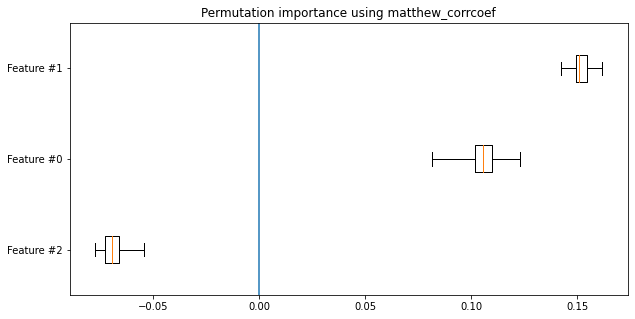

In [1197]:
import matplotlib.pyplot as plt

_, axs = plt.subplots(nrows=len(scoring), figsize=(10, 5))
for metric, ax in zip(scoring, [axs]):
    result = importances[metric]
    sorted_idx = result.importances_mean.argsort()

    ax.boxplot(
        result.importances[sorted_idx].T,
        vert=False,
        labels=np.array([f"Feature #{i}" for i in range(X.shape[1])])[sorted_idx],
        whis=100,
    )
    ax.vlines(0, 0.5, X.shape[1] + 0.5)
    ax.set_title(f"Permutation importance using {metric}")